In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import clear_output
import time

### Graph Environment Implementation

- Constructs the graph with edges: 0-4, 2-3, 3-1, 3-4, 1-5, 4-5, 5-5
- Provides methods for resetting, taking steps, and visualization

In [2]:
class GraphEnvironment:
    def __init__(self):
        # Our graph with 6 vertices (0,1,2,3,4,5) and edges:
        # 0-4, 2-3, 3-1, 3-4, 1-5, 4-5, 5-5
        self.graph = {
            0: [4],         # Vertex 0 is connected to vertex 4
            1: [3, 5],      # Vertex 1 is connected to vertices 3 and 5
            2: [3],         # Vertex 2 is connected to vertex 3
            3: [1, 2, 4],   # Vertex 3 is connected to vertices 1, 2, and 4
            4: [0, 3, 5],   # Vertex 4 is connected to vertices 0, 3, and 5
            5: [1, 4, 5]    # Vertex 5 is connected to vertices 1, 4, and itself (self-loop)
        }
        
        # Our goal is to reach vertex 5
        self.goal_state = 5
        
        # Current position (will be set when we reset the environment)
        self.current_state = None
        
    def reset(self, start_state=None):
        """Reset the environment to a starting state"""
        if start_state is not None and start_state in self.graph:
            # If a specific start state is given, use it
            self.current_state = start_state
        else:
            # Otherwise, randomly choose any vertex except the goal
            self.current_state = np.random.choice([0, 1, 2, 3, 4])
        
        return self.current_state
        
    def step(self, action):
        """Take an action (move to a neighbor) and return new state, reward, done"""
        # In our graph, an action is choosing which neighbor to move to
        # The action is an index into the list of neighbors
        
        # Check if action is valid (within the range of available neighbors)
        if action < len(self.graph[self.current_state]):
            # Get the next state (the neighbor we're moving to)
            next_state = self.graph[self.current_state][action]
            
            # Update our current position
            self.current_state = next_state
            
            # Check if we've reached the goal
            done = (self.current_state == self.goal_state)
            
            # Define reward:
            # +1 if we reached the goal
            # -0.01 small penalty for each step (to encourage finding shortest path)
            if done:
                reward = 100  
            else:
                reward = 0
                
            return self.current_state, reward, done
        else:
            # Invalid action - return current state with a penalty
            return self.current_state, 0, False
    
    def get_valid_actions(self, state):
        """Return the number of valid actions for a given state"""
        return len(self.graph[state])
    
    def render(self):
        """Visualize the graph and current position"""
        # Create a networkx graph
        G = nx.Graph()
        
        # Add all edges from our graph
        for node, neighbors in self.graph.items():
            for neighbor in neighbors:
                G.add_edge(node, neighbor)
        
        # Set up the visualization
        pos = nx.spring_layout(G, seed=42)  # Layout with consistent positions
        plt.figure(figsize=(8, 6))
        
        # Color nodes: 
        # - Red for current position
        # - Green for goal
        # - Gold if current position is the goal
        # - Blue for all others
        node_colors = []
        for node in G.nodes():
            if node == self.current_state and node == self.goal_state:
                node_colors.append('gold')
            elif node == self.current_state:
                node_colors.append('red')
            elif node == self.goal_state:
                node_colors.append('green')
            else:
                node_colors.append('lightblue')
        
        # Draw the graph
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
        nx.draw_networkx_edges(G, pos, width=2)
        nx.draw_networkx_labels(G, pos, font_size=15)
        
        plt.title(f"Current State: {self.current_state}, Goal: {self.goal_state}")
        plt.axis('off')
        plt.show()




### **Definizione della classe `GraphEnvironment`**
```python
class GraphEnvironment:
```
- Questa classe definisce un ambiente personalizzato basato su un grafo per un agente RL.

---

### **Metodo `__init__`**
```python
def __init__(self):
    self.graph = { ... }  # Definizione del grafo con connessioni tra i nodi
    self.goal_state = 5   # Obiettivo dell'agente: raggiungere il nodo 5
    self.current_state = None  # Stato corrente dell'agente (verrà impostato dopo `reset`)
```
- Inizializza il grafo, lo stato obiettivo e lo stato corrente.
- Il grafo è rappresentato come un dizionario: ogni nodo è una chiave con i nodi vicini come valori.

---

### **Metodo `reset`**
```python
def reset(self, start_state=None):
    if start_state is not None and start_state in self.graph:
        self.current_state = start_state
    else:
        self.current_state = np.random.choice([0, 1, 2, 3, 4])
    return self.current_state
```
- Ripristina l'ambiente impostando uno stato iniziale.
- Se `start_state` è fornito e valido, viene utilizzato; altrimenti, viene scelto casualmente uno stato tra i nodi disponibili (escluso il nodo obiettivo).

---

### **Metodo `step`**
```python
def step(self, action):
    if action < len(self.graph[self.current_state]):
        next_state = self.graph[self.current_state][action]  # Nodo successivo
        self.current_state = next_state  # Aggiorna posizione corrente
        done = (self.current_state == self.goal_state)  # Verifica se l'obiettivo è raggiunto
        reward = 100 if done else 0  # Ricompensa basata sul raggiungimento dell'obiettivo
        return self.current_state, reward, done
    else:
        return self.current_state, 0, False
```
- L'agente compie un'azione, aggiornando lo stato corrente e ricevendo una ricompensa.
- `action` rappresenta l'indice di un nodo vicino, controllando la validità dell'azione.
- Se raggiunge il nodo obiettivo, ottiene una ricompensa positiva; altrimenti, la ricompensa è 0.

---

### **Metodo `get_valid_actions`**
```python
def get_valid_actions(self, state):
    return len(self.graph[state])  # Restituisce il numero di vicini di un nodo specifico
```
- Ritorna il numero di azioni valide per il nodo fornito.

---

### **Metodo `render`**
```python
def render(self):
    G = nx.Graph()  # Crea un grafo con NetworkX
    for node, neighbors in self.graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)  # Aggiunge tutti gli archi
    pos = nx.spring_layout(G, seed=42)  # Posizionamento grafico dei nodi
    ...
```
- Visualizza il grafo e lo stato attuale usando NetworkX.
- `pos` definisce la disposizione dei nodi nel grafico.
- I nodi sono colorati per rappresentare:
  - Rosso: posizione corrente.
  - Verde: nodo obiettivo.
  - Oro: agente sul nodo obiettivo.
  - Azzurro: altri nodi.

---


In [3]:
# Create the environment
env = GraphEnvironment()

env = GraphEnvironment():

Crea un oggetto della classe GraphEnvironment.

In questo momento, il grafo, lo stato obiettivo e lo stato corrente vengono inizializzati all'interno del metodo __init__.

env.render():

Questo metodo utilizza la libreria networkx per rappresentare graficamente il grafo.

Ogni nodo è visualizzato con un colore specifico in base al suo stato:

Rosso: Nodo dove si trova attualmente l'agente.

Verde: Nodo obiettivo (in questo caso, il nodo 5).

Oro: Nodo che coincide sia con la posizione corrente che con l'obiettivo (se l'agente raggiunge il nodo 5).

Azzurro: Nodi generici non interessati dalla posizione corrente o dall'obiettivo.

Inoltre, la disposizione grafica dei nodi è gestita dal layout spring_layout.

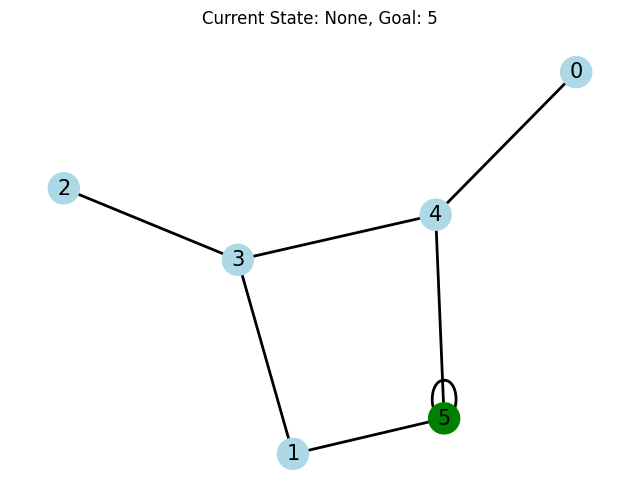

In [4]:
env.render()

In [14]:
env.get_valid_actions(1), env.get_valid_actions(2), env.get_valid_actions(5)

(2, 1, 3)

Il metodo get_valid_actions(state) restituisce il numero di azioni valide per un determinato stato. In questo caso, il numero di azioni valide è uguale al numero di vicini per ciascun nodo nel grafo.

Analizziamo i risultati per i nodi richiesti:

Nodo 1: Nel grafo, il nodo 1 è connesso ai nodi [3, 5]. Quindi, ci sono 2 azioni valide.

Nodo 2: Nel grafo, il nodo 2 è connesso solo al nodo [3]. Quindi, c'è 1 azione valida.

Nodo 5: Nel grafo, il nodo 5 è connesso ai nodi [1, 4, 5]. Quindi, ci sono 3 azioni valide (incluso il ciclo sul nodo stesso).

Risultato:

(2, 1, 3)

In [6]:
env.current_state, env.goal_state

(None, 5)

env.current_state: Indica lo stato attuale dell'agente. Inizialmente è impostato a None e viene aggiornato quando l'ambiente viene resettato usando env.reset(). Se non hai ancora usato il metodo reset, il valore sarà ancora None.

env.goal_state: Rappresenta lo stato obiettivo, che è predefinito a 5 nel metodo __init__.

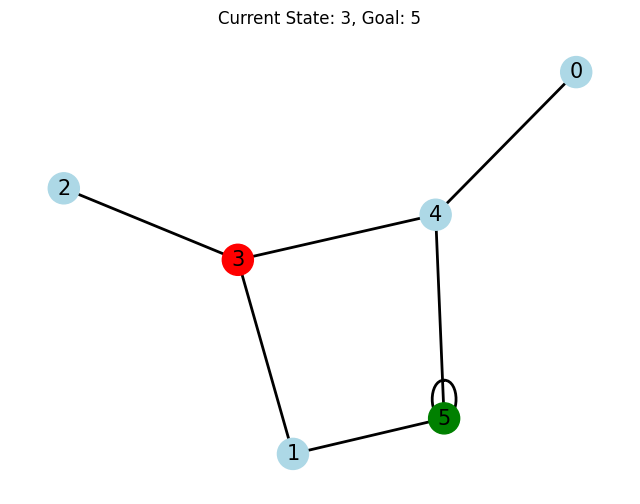

In [7]:
env.reset(start_state=3)
env.render()

Il comando env.reset(start_state=3) imposta lo stato iniziale dell'agente al nodo 3. Dopo questo, il metodo env.render() visualizzerà il grafo con il nodo 3 evidenziato in rosso come stato corrente, mentre il nodo 5 (goal) sarà evidenziato in verde. Se il nodo corrente coincide con l'obiettivo, esso sarà colorato in oro.

In [8]:
current_state, reward, get_gole = env.step(0)
print("We do the step from 3 to 1, the current state is: ", current_state)
print("The reward we get from this action: ", reward)
print("Did we achieve the goal: ", get_gole)

We do the step from 3 to 1, the current state is:  1
The reward we get from this action:  0
Did we achieve the goal:  False


Descrizione
env.step(0):

L'agente esegue un'azione nel suo stato corrente (nodo 3).

L'azione 0 rappresenta il movimento verso il primo vicino nella lista di connessioni del nodo 3, che è il nodo 1.

Dopo aver compiuto questa azione, i seguenti valori sono restituiti:

current_state: Il nuovo stato (dopo il movimento), che sarà 1.

reward: La ricompensa per questa azione (nel tuo codice è 0, perché non si è raggiunto l'obiettivo).

get_gole: Indica se l'agente ha raggiunto l'obiettivo (sarà False, dato che il nodo corrente è 1, non il nodo 5).

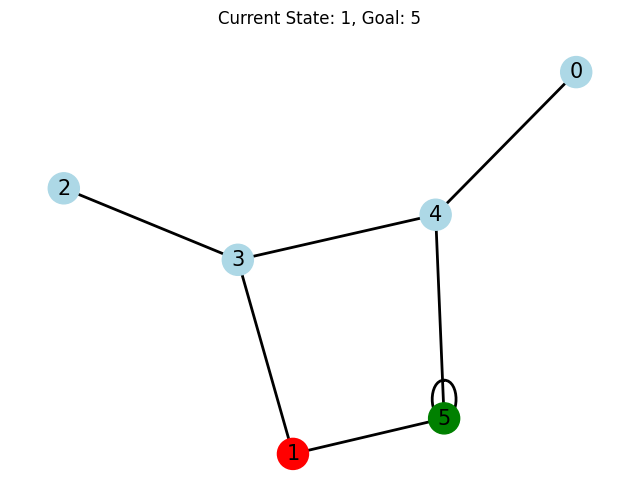

In [9]:
env.render()

### Q-Learning Agent:

- Implements an epsilon-greedy policy for exploration vs. exploitation
- Maintains a Q-table to store state-action values
- Learns through trial and error with a reward structure

 Q-Learning Agent è un concetto fondamentale nel mondo del Reinforcement Learning! 
---

### **1. Implementa una politica epsilon-greedy (esplorazione vs sfruttamento)**
- **Cosa significa?**
  - L'agente deve decidere se *esplorare* nuove azioni (esplorazione) o *sfruttare* quelle già conosciute come ottimali (sfruttamento).
  - La politica epsilon-greedy introduce una variabile \(\epsilon\), che rappresenta la probabilità di *esplorare* una nuova azione.
    - Con probabilità \(\epsilon\), l'agente sceglie un'azione casuale (*esplorazione*).
    - Con probabilità \(1 - \epsilon\), sceglie l'azione migliore conosciuta (*sfruttamento*).
  - Questo bilanciamento aiuta l'agente a non cadere in *trappole locali* o politiche sub-ottimali.

- **Formula generale per aggiornare l'epsilon:**
  - \($\epsilon \text{ decresce nel tempo: } \epsilon = \max(\epsilon_{\text{min}}, \epsilon_{\text{iniziale}} \times \text{fattore decrescita})$\).

---

### **2. Mantiene una Q-table (tabella dei valori stato-azione)**
- **Che cos'è la Q-table?**
  - È una tabella che associa ogni coppia *stato-azione* \($(s, a)$\) a un valore \($Q(s, a)$\), che rappresenta la stima del "valore" di eseguire l'azione \($a$\) nello stato \($s$\).
  - L'agente aggiorna la Q-table durante l'apprendimento per migliorare le sue scelte future.

- **Aggiornamento della Q-table**:
  - Basato sull'equazione di Bellman:
    \[$
    Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_a Q(s', a) - Q(s, a) \right]$
    \]
    - \($\alpha$\): tasso di apprendimento (quanto ci fidiamo della nuova informazione).
    - \($r$\): ricompensa immediata.
    - \($\gamma$\): fattore di sconto (quanto l'agente valuta le ricompense future).
    - \($\max_a Q(s', a)$\): stima del massimo valore delle azioni disponibili nel nuovo stato \($s'$\).

---

### **3. Apprendimento tramite tentativi ed errori con una struttura di ricompensa**
- **Come apprende il Q-Learning Agent?**
  - Inizia con una Q-table vuota (o casuale) e interagisce con l'ambiente.
  - Attraverso *tentativi ed errori*, l'agente esplora l'ambiente e riceve ricompense basate sulle sue azioni.
  - Utilizzando l'equazione di Bellman, l'agente migliora le sue stime \(Q(s, a)\) per prendere decisioni migliori in futuro.

- **Struttura di ricompensa**:
  - Ricompensa positiva (\(+r\)) per raggiungere obiettivi desiderati.
  - Penalità (\(-r\)) per azioni che lo allontanano dall'obiettivo.
  - Nessuna ricompensa (0) per azioni neutrali.

---

### **Ciclo del Q-Learning**
1. Osserva lo stato corrente \($s$\).
2. Seleziona un'azione \($a$\) usando la politica epsilon-greedy.
3. Esegue l'azione \($a$\) e osserva:
   - Nuovo stato \($s'$\).
   - Ricompensa \($r$\).
4. Aggiorna la Q-table usando l'equazione di Bellman.
5. Ripeti fino a convergenza o esaurimento delle iterazioni.

---

### **Vantaggi e Limitazioni**
- **Vantaggi**:
  - Algoritmo semplice e intuitivo.
  - Converge a una politica ottimale se \(\alpha\) e \(\epsilon\) sono ben configurati.
- **Limitazioni**:
  - Scalabilità: poco efficiente in ambienti con molti stati/azioni (problema della dimensionalità).
  - Non adatto per ambienti continui o complessi senza modifiche (es., utilizzo di reti neurali come in Deep Q-Learning).

---



In [15]:
class SimpleQLearningAgent: #Crea una classe che rappresenta un agente RL con Q-Learning.
    def __init__(self, n_states=6, max_actions=3, 
                 learning_rate=0.1, discount_factor=0.9, exploration_rate=1.0):
        """
        Inizializza un agente Q-Learning con i seguenti parametri:

    n_states: Numero di stati possibili (es., i nodi del grafo).

    max_actions: Numero massimo di azioni disponibili in ogni stato (massimo numero di vicini di un nodo).

    learning_rate (𝛼): Velocità di apprendimento.

    discount_factor (𝛾): Quanto pesano le ricompense future.

    exploration_rate (𝜖): Probabilità di esplorare rispetto a sfruttare.
        """
        # Inizializza la Q-table come una matrice con tutti valori iniziali impostati a zero.
        
        self.q_table = np.zeros((n_states, max_actions))

        # La Q-table ha dimensioni [n_states, max_actions]:
        # Riga: stato corrente 𝑠
        # Colonna: azione 𝑎
        #Ogni elemento rappresenta il valore stimato Q(s,a) per quella coppia stato-azione.
        
        # Set learning parameters
        self.learning_rate = learning_rate  #Controlla quanto velocemente l'agente aggiorna la Q-table.
        self.discount_factor = discount_factor #Fattore di sconto che bilancia ricompense immediate e future.
        self.exploration_rate = exploration_rate # Probabilità iniziale di esplorare.
        
    def choose_action(self, state, valid_actions):
        """Decide quale azione compiere nello stato corrente utilizzando una politica epsilon-greedy."""
        # Epsilon-greedy: sometimes explore, sometimes exploit
        
        if np.random.random() < self.exploration_rate:
            # EXPLORE: choose a random valid action
            return np.random.randint(0, valid_actions) #e un numero casuale è inferiore a 𝜖, 
            # l'agente esplora scegliendo un'azione casuale tra quelle valide.
        else:
            # Altrimenti, l'agente sfrutta scegliendo l'azione con il valore 𝑄 più alto nella Q-table.
            # Only consider valid actions for this state
            state_q_values = self.q_table[state, :valid_actions]
            return np.argmax(state_q_values)
    
    def learn(self, state, action, reward, next_state, next_valid_actions, done): # Utilizza l'equazione di Bellman per aggiornare 
        # i valori della Q-table:
        """Update Q-table based on the observed transition"""
        # Q-Learning formula: Q(s,a) = Q(s,a) + α * [r + γ * max(Q(s',a')) - Q(s,a)]
        
        # First, find the best expected future reward from the next state
        next_q_values = self.q_table[next_state, :next_valid_actions]
        best_next_q = np.max(next_q_values) if next_valid_actions > 0 else 0

        # Trova il miglior valore 𝑄 ( 𝑠 ′ , 𝑎 ′ ) nello stato successivo 𝑠 ′
        # considerando tutte le azioni possibili. Se non ci sono azioni valide ( 𝑛 𝑒 𝑥 𝑡 𝑣 𝑎 𝑙 𝑖 𝑑 𝑎 𝑐 𝑡 𝑖 𝑜 𝑛 𝑠 = 0 ), il miglior valore è 0.
        
        # If we're done (reached the goal), there's no future reward
        if done:
            future_reward = 0
        else:
            future_reward = self.discount_factor * best_next_q 
            # Se l'agente ha raggiunto l'obiettivo (done=True), non ci sono ricompense future. 
            # Altrimenti, calcola il valore futuro scontato usando 𝛾 .
        
        # Calculate the target Q-value
        target_q = reward + future_reward # Calcola il target Q-value: target 𝑞 = 𝑟 + 𝛾 ⋅ max ⁡ 𝑄 ( 𝑠 ′ , 𝑎 ′ )
        
        # Update the Q-value for the current state and action
        current_q = self.q_table[state, action]
        self.q_table[state, action] = current_q + self.learning_rate * (target_q - current_q)
    # Aggiorna il valore corrente nella Q-table utilizzando la formula di Q-learning: 𝑄 ( 𝑠 , 𝑎 ) ← 𝑄 ( 𝑠 , 𝑎 ) + 𝛼 ⋅ ( target 𝑞 − 𝑄 ( 𝑠 , 𝑎 ) )

    
    def decrease_exploration(self, decay=0.995):
        """Gradually reduce exploration rate to exploit more over time""" # Riduce gradualmente il valore di 𝜖 per far sì che l'agente sfrutti
        # sempre di più nel tempo.
        self.exploration_rate *= decay
        # Don't let it go below 0.01 (1% exploration)
        self.exploration_rate = max(0.01, self.exploration_rate)
        # Ogni volta che viene chiamato, 𝜖 viene moltiplicato per un fattore di decadimento ( 0.995 di default).
        # Il valore di 𝜖 non scenderà mai sotto il limite di 0.01 (1% di esplorazione).

### Training Process:

- Trains the agent over 300 episodes
- Tracks metrics like reward, episode length, and success rate



### **Passaggi del Training Process**
1. **Inizializzazione**:
   - L'agente parte con una Q-table vuota (o inizializzata con valori casuali).
   - Il processo si svolge su **300 episodi**, in cui ogni episodio rappresenta un ciclo completo di interazione con l'ambiente fino al raggiungimento dell'obiettivo o l'esaurimento dei tentativi.

---

2. **Logica dell'episodio**:
   - All'inizio di ogni episodio:
     - L'ambiente viene resettato con uno stato iniziale casuale.
     - L'agente comincia a scegliere azioni basate sulla politica epsilon-greedy.
   - Durante l'episodio:
     - L'agente compie un'azione.
     - Riceve ricompensa e osserva il nuovo stato.
     - Aggiorna la Q-table usando l'equazione di Bellman.
   - L'episodio termina quando l'agente raggiunge il goal o quando supera un massimo di passi definito.

---

3. **Metriche tracciate**:
   - **Reward totale**:
     - Somma delle ricompense accumulate durante l'episodio.
   - **Lunghezza dell'episodio**:
     - Numero di passi effettuati dall'agente per completare un episodio.
   - **Success Rate**:
     - Percentuale di episodi in cui l'agente raggiunge il goal.

---

4. **Riduzione di \(\epsilon\)**:
   - Dopo ogni episodio, l'\(\epsilon\) (tasso di esplorazione) viene ridotto gradualmente per favorire lo sfruttamento. Ad esempio:
     ```python
     agent.decrease_exploration(decay=0.995)
     ```


In [16]:
def train_agent(episodes=300, render_every=50):
    """Addestrare l'agente nell'ambiente del grafo"""
    
    # Crea l'ambiente e l'agente
    env = GraphEnvironment()
    
    # Trova il numero massimo di azioni possibili in qualsiasi stato (numero massimo di vicini)
    max_actions = max(len(neighbors) for neighbors in env.graph.values())
    
    # Crea il nostro agente
    agent = SimpleQLearningAgent(
        n_states=6,                 # 6 nodi (vertici) nel grafo
        max_actions=max_actions,    # Numero massimo di vicini di un nodo
        learning_rate=0.1,          # Tasso di apprendimento moderato (alpha)
        discount_factor=0.95,       # Valuta molto le ricompense future (gamma)
        exploration_rate=1.0        # Inizia esplorando completamente (epsilon=1)
    )
    
    # Liste per tracciare i progressi durante l'addestramento
    all_rewards = []  # Memorizza le ricompense totali per ogni episodio
    all_steps = []    # Memorizza il numero di passi per raggiungere l'obiettivo

    # Ciclo di addestramento
    for episode in range(episodes):
        # Ripristina l'ambiente per iniziare un nuovo episodio
        state = env.reset()
        episode_reward = 0
        steps = 0
        done = False
        
        # Visualizza lo stato iniziale ogni render_every episodi
        if episode % render_every == 0:
            print(f"\nEpisodio {episode}: Partenza dal nodo {state}")
            env.render()
        
        # Ciclo fino a raggiungere l'obiettivo o superare il limite di passi
        while not done and steps < 20:
            # Ottieni il numero di azioni valide (vicini del nodo corrente)
            valid_actions = env.get_valid_actions(state)
            
            # L'agente sceglie un'azione usando la politica epsilon-greedy
            action = agent.choose_action(state, valid_actions)
            
            # Esegui l'azione
            next_state, reward, done = env.step(action)
            
            # Ottieni le azioni valide per il prossimo stato
            next_valid_actions = env.get_valid_actions(next_state)
            
            # L'agente apprende dall'esperienza e aggiorna la Q-table
            agent.learn(state, action, reward, next_state, next_valid_actions, done)
            
            # Aggiorna lo stato corrente e le metriche
            state = next_state
            episode_reward += reward
            steps += 1
            
            # Visualizza lo stato finale ogni render_every episodi
            if done and episode % render_every == 0:
                print(f"Obiettivo raggiunto in {steps} passi!")
                env.render()
        
        # Memorizza le metriche per questo episodio
        all_rewards.append(episode_reward)
        all_steps.append(steps)
        
        # Riduce il tasso di esplorazione (epsilon) per favorire lo sfruttamento nel tempo
        agent.decrease_exploration()
        
        # Stampa il riassunto ogni render_every episodi
        if episode % render_every == 0:
            print(f"Episodio {episode}")
            print(f"Passi: {steps}")
            print(f"Ricompensa totale: {episode_reward:.2f}")
            print(f"Tasso di esplorazione: {agent.exploration_rate:.2f}")
            
            # Visualizza la Q-table corrente
            print("\nQ-table corrente:")
            for s in range(6):  # Per ogni nodo
                valid = env.get_valid_actions(s)
                print(f"Nodo {s}: {agent.q_table[s, :valid]}")
    
    # Grafico dei progressi dell'addestramento
    plt.figure(figsize=(12, 5))
    
    # Grafico delle ricompense per episodio
    plt.subplot(1, 2, 1)
    plt.plot(all_rewards)
    plt.title('Ricompense per episodio')
    plt.xlabel('Episodio')
    plt.ylabel('Ricompensa totale')
    
    # Grafico del numero di passi per episodio
    plt.subplot(1, 2, 2)
    plt.plot(all_steps)
    plt.title('Passi per episodio')
    plt.xlabel('Episodio')
    plt.ylabel('Passi per raggiungere l\'obiettivo')
    
    # Migliora la visualizzazione dei grafici
    plt.tight_layout()
    plt.show()
    
    return env, agent  # Ritorna l'ambiente e l'agente addestrato


Spiegazione

Questo codice definisce un processo di addestramento del Q-Learning Agent nell'ambiente grafo.

Usa un approccio epsilon-greedy per bilanciare esplorazione e sfruttamento.

Registra metriche importanti come ricompense totali e passi per ciascun episodio.

Visualizza l'ambiente e la Q-table per monitorare i progressi.

Grafici finali mostrano l'andamento delle ricompense e dei passi durante l'addestramento.

### Testing & Visualization:

- Tests the learned policy from each starting vertex
- Visualizes the optimal paths found
- Displays the final Q-table values

In [17]:
def test_policy(env, agent, start_state):
    """Testa la politica appresa partendo da uno stato specifico"""
    
    # Ripristina l'ambiente allo stato iniziale specificato
    state = env.reset(start_state)
    print(f"\nTest in corso dal vertice {start_state}:")
    env.render()  # Visualizza lo stato iniziale del grafo
    
    # Variabili per tracciare il progresso
    done = False  # Indica se l'obiettivo è stato raggiunto
    steps = 0     # Conta il numero di passi effettuati
    path = [state]  # Traccia il percorso effettuato
    
    # Segue la politica appresa fino a raggiungere l'obiettivo o superare il limite di passi
    while not done and steps < 10:
        # Ottieni le azioni valide dallo stato corrente
        valid_actions = env.get_valid_actions(state)
        
        # Scegli l'azione migliore dalla Q-table (senza esplorazione)
        q_values = agent.q_table[state, :valid_actions]
        action = np.argmax(q_values)  # Ottieni l'azione con il valore Q più alto
        
        print(f"Dal vertice {state}, scelta azione {action} con valore Q {q_values[action]:.2f}")
        
        # Esegui l'azione
        next_state, reward, done = env.step(action)  # Vai al prossimo stato
        path.append(next_state)  # Aggiorna il percorso
        
        # Visualizza lo stato dopo aver compiuto l'azione
        env.render()
        
        # Aggiorna lo stato per il prossimo passo
        state = next_state
        steps += 1  # Incrementa il conteggio dei passi
    
    # Visualizza il percorso finale
    print(f"Percorso effettuato: {' -> '.join(map(str, path))}")
    if done:
        print(f"Obiettivo raggiunto in {steps} passi!")
    else:
        print(f"Obiettivo non raggiunto dopo {steps} passi.")


In [18]:
def visualize_policy(env, agent):
    """Visualizza la politica appresa come grafo diretto"""
    
    # Crea un grafo diretto
    G = nx.DiGraph()
    
    # Aggiunge tutti i nodi al grafo
    for node in range(6):  # Sei vertici totali (0-5)
        G.add_node(node)
    
    # Aggiunge archi in base alla politica appresa
    for state in range(6):
        # Salta lo stato obiettivo, dato che non esegue ulteriori azioni
        if state == env.goal_state:
            continue
        
        # Ottieni le azioni valide e i relativi valori Q
        valid_actions = env.get_valid_actions(state)
        q_values = agent.q_table[state, :valid_actions]
        
        # Determina l'azione migliore dalla Q-table
        if valid_actions > 0:
            best_action = np.argmax(q_values)  # Azione con valore Q massimo
            best_q = q_values[best_action]    # Miglior valore Q
            
            # Trova lo stato successivo a cui l'azione conduce
            next_state = env.graph[state][best_action]
            
            # Aggiungi un arco diretto al grafo
            G.add_edge(state, next_state, weight=best_q)
    
    # Visualizza il grafo
    pos = nx.spring_layout(G, seed=42)  # Layout dei nodi nel grafo
    plt.figure(figsize=(10, 8))
    
    # Colore dei nodi: verde per il nodo obiettivo, azzurro per gli altri
    node_colors = ['green' if n == env.goal_state else 'lightblue' for n in G.nodes()]
    
    # Disegna i nodi del grafo
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_edges(G, pos, arrowsize=20, width=2)  # Disegna gli archi con frecce
    nx.draw_networkx_labels(G, pos, font_size=15)  # Etichette dei nodi
    
    # Aggiunge etichette agli archi (valori Q)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # Titolo e opzioni grafiche
    plt.title("Politica appresa (le frecce indicano le migliori azioni)")
    plt.axis('off')
    plt.show()


Cosa fa questo codice?
**test_policy:**

Simula un percorso dall'agente seguendo la Q-table.

Mostra passo per passo le azioni prese, i nodi visitati e il percorso finale.

**visualize_policy:**

Disegna un grafo diretto che rappresenta la politica appresa.

Ogni freccia rappresenta la migliore azione appresa dall'agente, con un'etichetta che mostra il valore Q corrispondente.

Training the agent...

Episodio 0: Partenza dal nodo 0


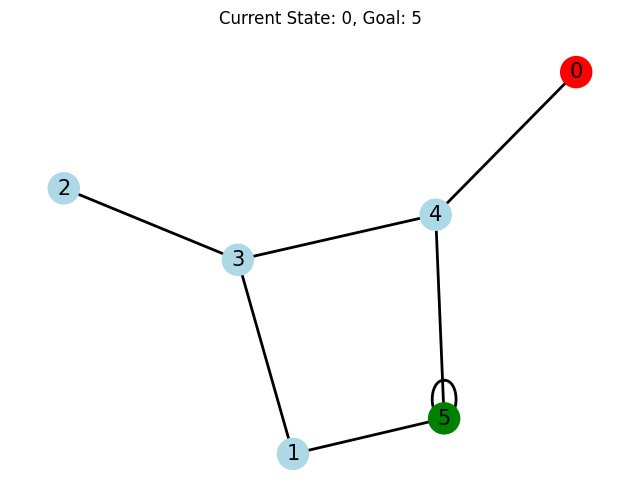

Obiettivo raggiunto in 4 passi!


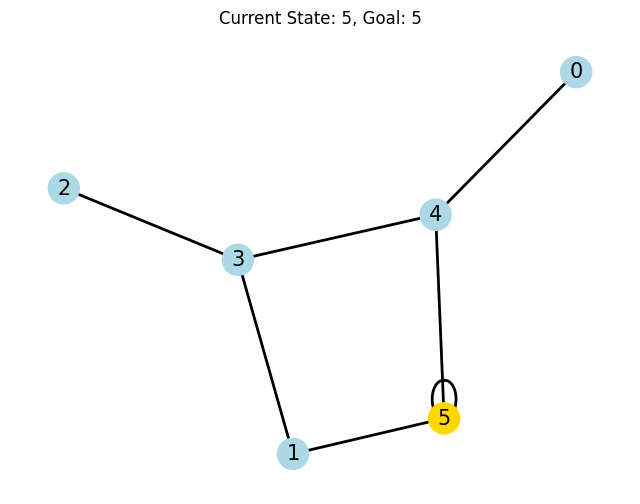

Episodio 0
Passi: 4
Ricompensa totale: 100.00
Tasso di esplorazione: 0.99

Q-table corrente:
Nodo 0: [0.]
Nodo 1: [0. 0.]
Nodo 2: [0.]
Nodo 3: [0. 0. 0.]
Nodo 4: [ 0.  0. 10.]
Nodo 5: [0. 0. 0.]

Episodio 50: Partenza dal nodo 3


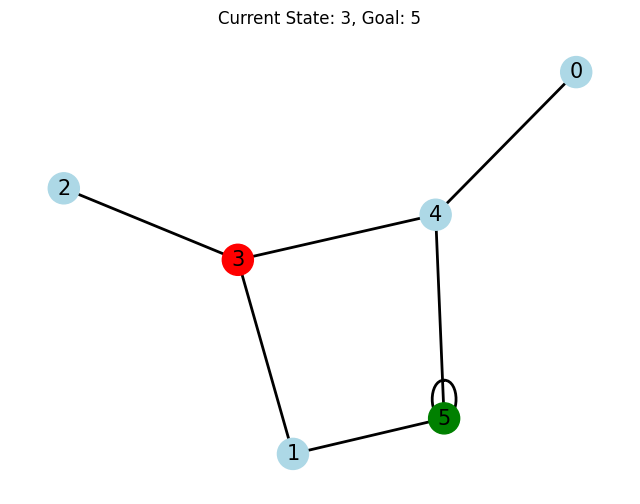

Obiettivo raggiunto in 2 passi!


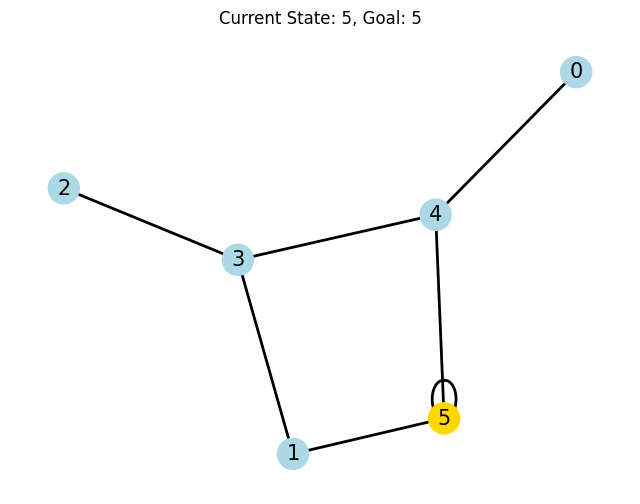

Episodio 50
Passi: 2
Ricompensa totale: 100.00
Tasso di esplorazione: 0.77

Q-table corrente:
Nodo 0: [70.09315917]
Nodo 1: [33.84483888 84.99053647]
Nodo 2: [54.91927702]
Nodo 3: [57.34026371 28.10636857 81.74538804]
Nodo 4: [27.23520601 42.23151231 96.90968456]
Nodo 5: [0. 0. 0.]

Episodio 100: Partenza dal nodo 0


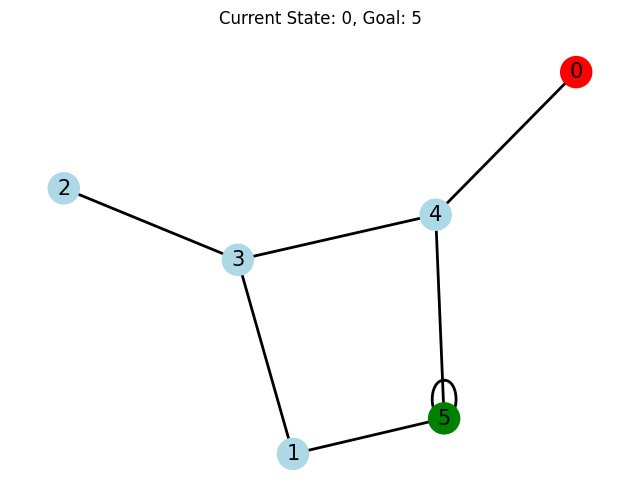

Obiettivo raggiunto in 2 passi!


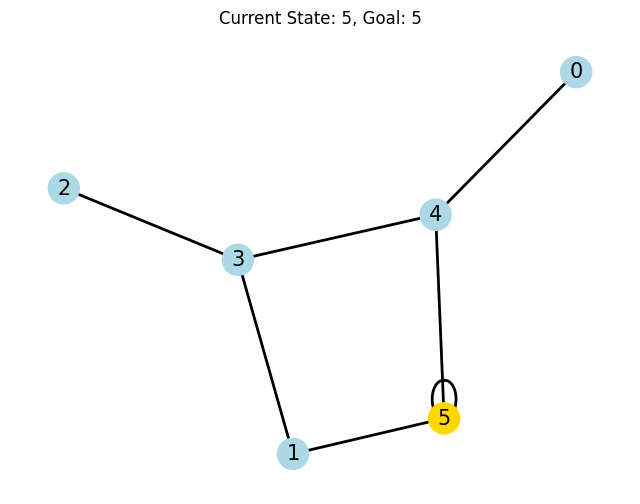

Episodio 100
Passi: 2
Ricompensa totale: 100.00
Tasso di esplorazione: 0.60

Q-table corrente:
Nodo 0: [91.61629879]
Nodo 1: [61.01774508 95.2898713 ]
Nodo 2: [85.53443769]
Nodo 3: [77.80690477 65.57140174 94.09467984]
Nodo 4: [54.04802374 74.47727453 99.94924712]
Nodo 5: [0. 0. 0.]

Episodio 150: Partenza dal nodo 1


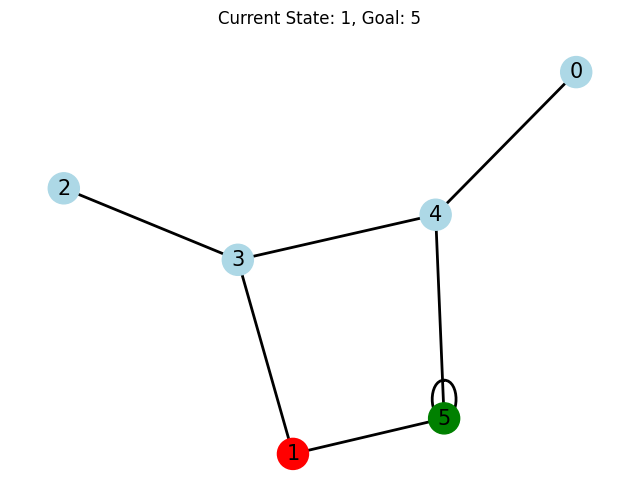

Obiettivo raggiunto in 1 passi!


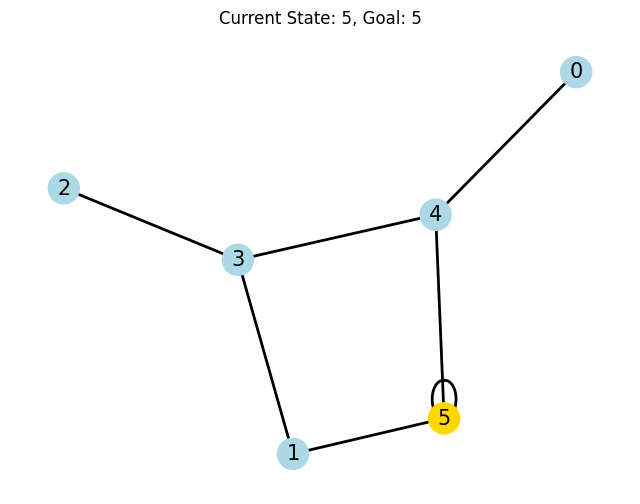

Episodio 150
Passi: 1
Ricompensa totale: 100.00
Tasso di esplorazione: 0.47

Q-table corrente:
Nodo 0: [94.72338084]
Nodo 1: [68.88120849 99.03022627]
Nodo 2: [89.17397472]
Nodo 3: [86.30307061 76.59215523 94.91025631]
Nodo 4: [81.99612619 83.95928862 99.99872958]
Nodo 5: [0. 0. 0.]

Episodio 200: Partenza dal nodo 4


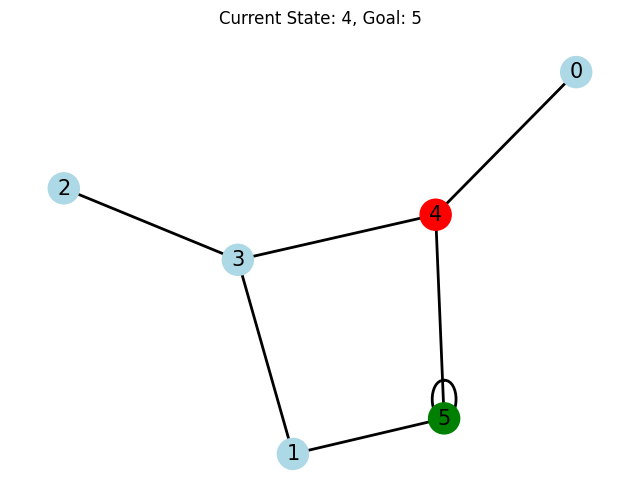

Obiettivo raggiunto in 1 passi!


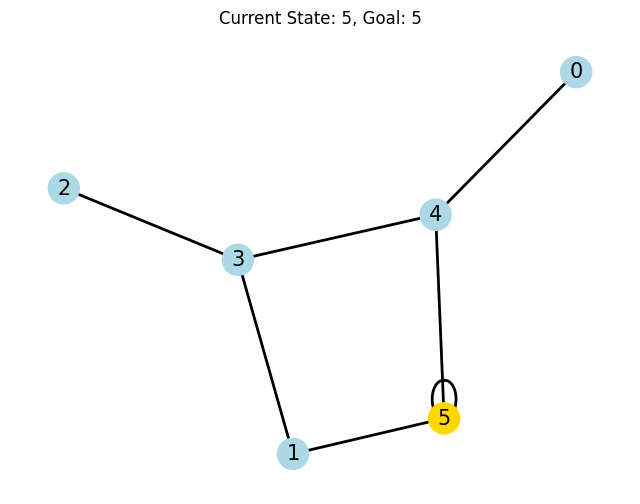

Episodio 200
Passi: 1
Ricompensa totale: 100.00
Tasso di esplorazione: 0.37

Q-table corrente:
Nodo 0: [94.96964585]
Nodo 1: [77.62598955 99.77814688]
Nodo 2: [89.95540313]
Nodo 3: [90.57854085 78.95593054 94.99398519]
Nodo 4: [86.62506119 88.04299975 99.99997138]
Nodo 5: [0. 0. 0.]

Episodio 250: Partenza dal nodo 3


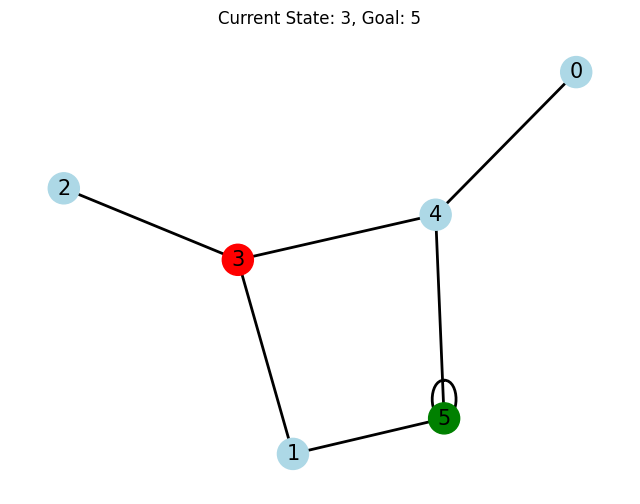

Obiettivo raggiunto in 2 passi!


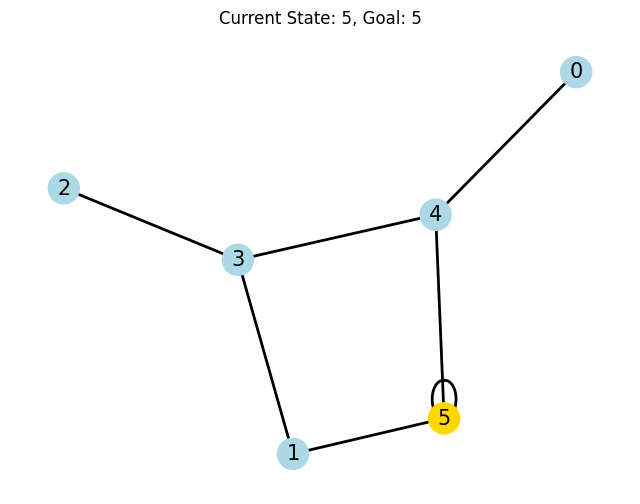

Episodio 250
Passi: 2
Ricompensa totale: 100.00
Tasso di esplorazione: 0.28

Q-table corrente:
Nodo 0: [94.99544048]
Nodo 1: [81.04690673 99.93038014]
Nodo 2: [90.18135596]
Nodo 3: [91.40219678 79.61132052 94.99960803]
Nodo 4: [88.83820044 89.076047   99.99999953]
Nodo 5: [0. 0. 0.]


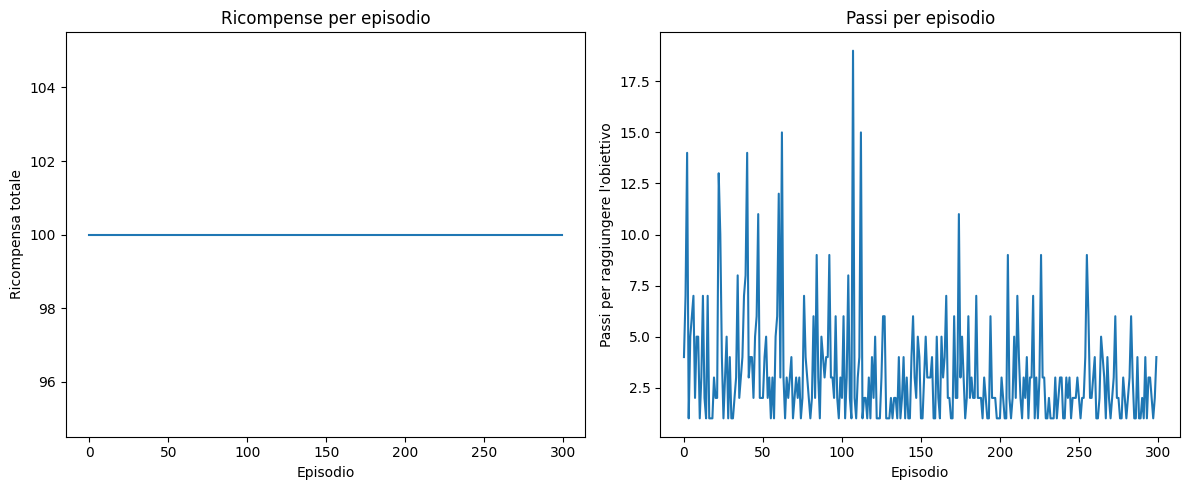


Final Q-table:
State 0: [94.99895687]
State 1: [83.54089848 99.97302784]
State 2: [90.23248831]
State 3: [92.36370119 82.10324814 94.99998149]
State 4: [89.4986511  89.5567455  99.99999999]
State 5: [0. 0. 0.]

Learned policy visualization:


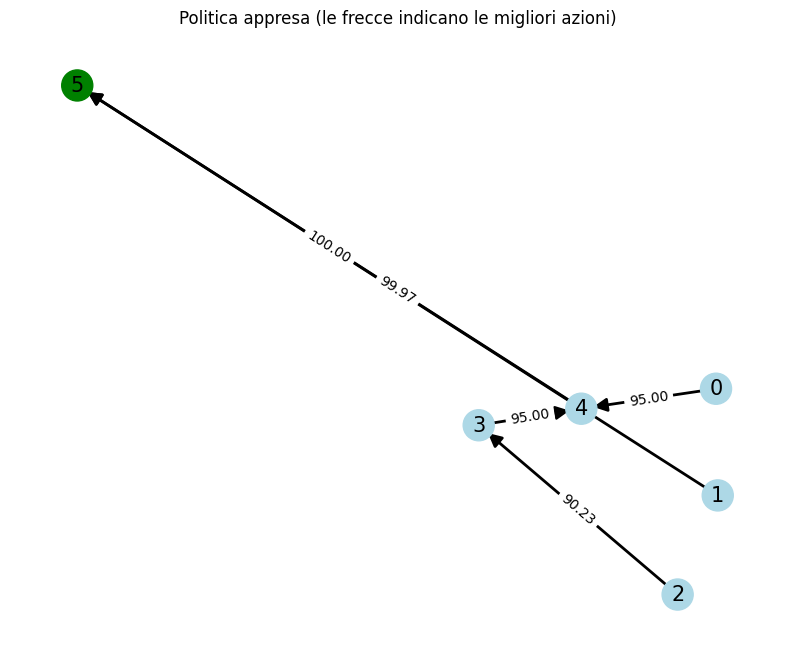


Test in corso dal vertice 0:


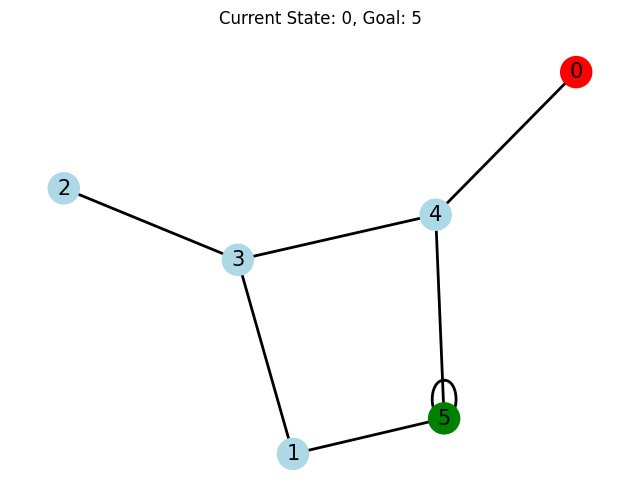

Dal vertice 0, scelta azione 0 con valore Q 95.00


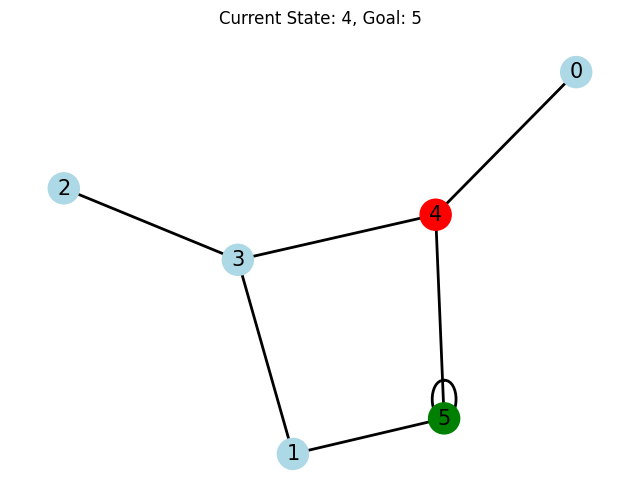

Dal vertice 4, scelta azione 2 con valore Q 100.00


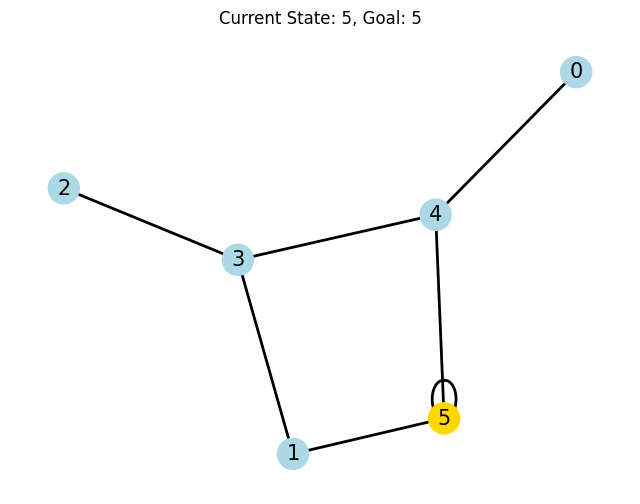

Percorso effettuato: 0 -> 4 -> 5
Obiettivo raggiunto in 2 passi!

Test in corso dal vertice 1:


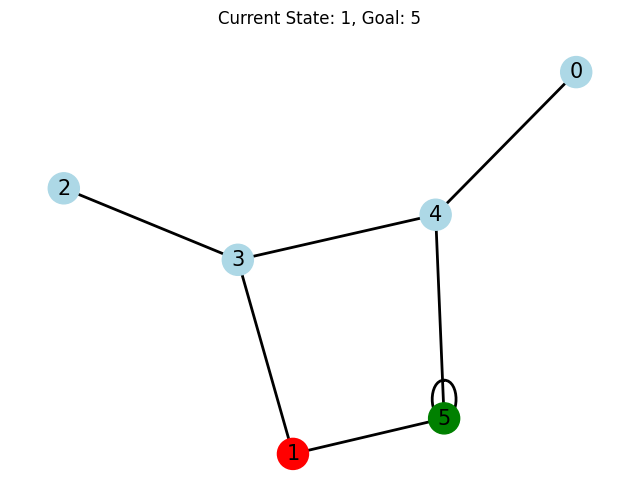

Dal vertice 1, scelta azione 1 con valore Q 99.97


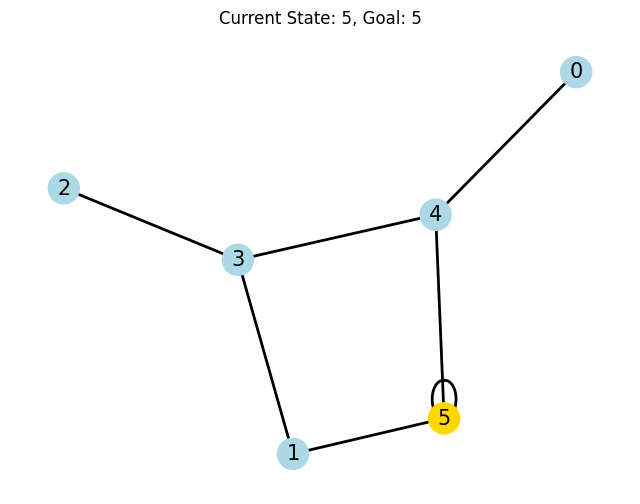

Percorso effettuato: 1 -> 5
Obiettivo raggiunto in 1 passi!

Test in corso dal vertice 2:


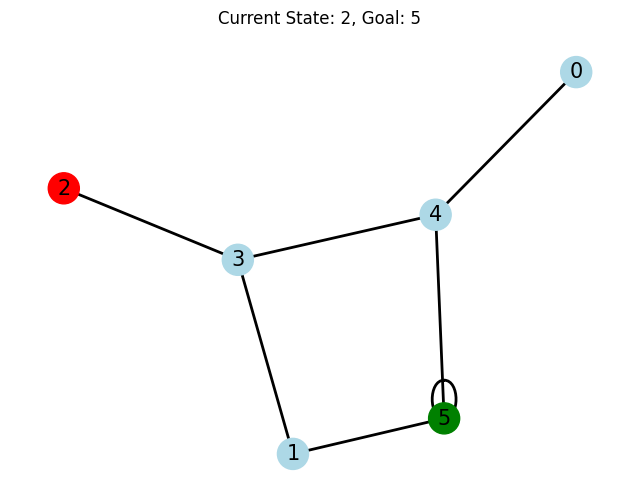

Dal vertice 2, scelta azione 0 con valore Q 90.23


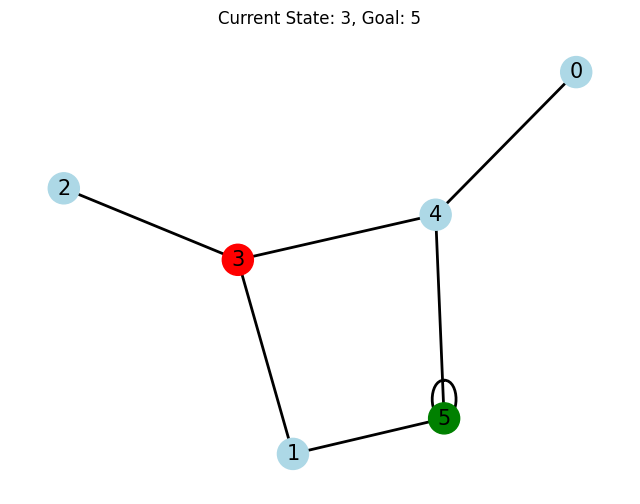

Dal vertice 3, scelta azione 2 con valore Q 95.00


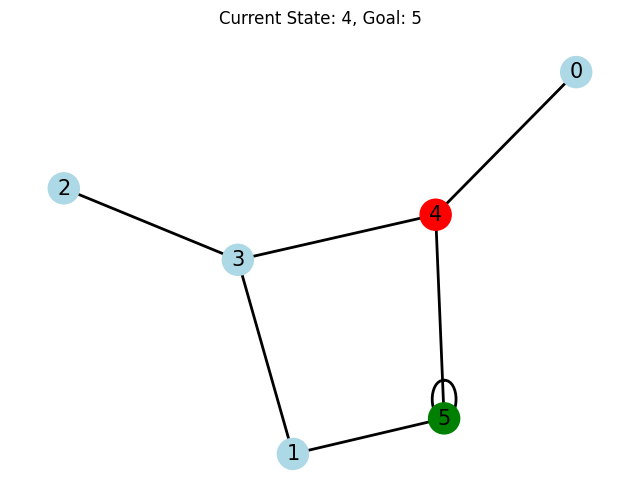

Dal vertice 4, scelta azione 2 con valore Q 100.00


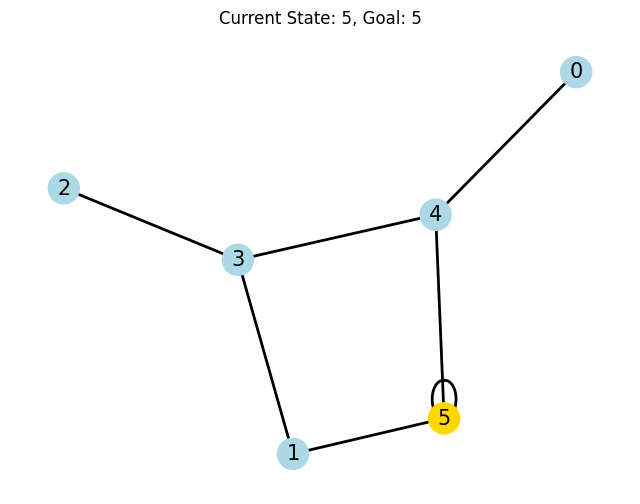

Percorso effettuato: 2 -> 3 -> 4 -> 5
Obiettivo raggiunto in 3 passi!

Test in corso dal vertice 3:


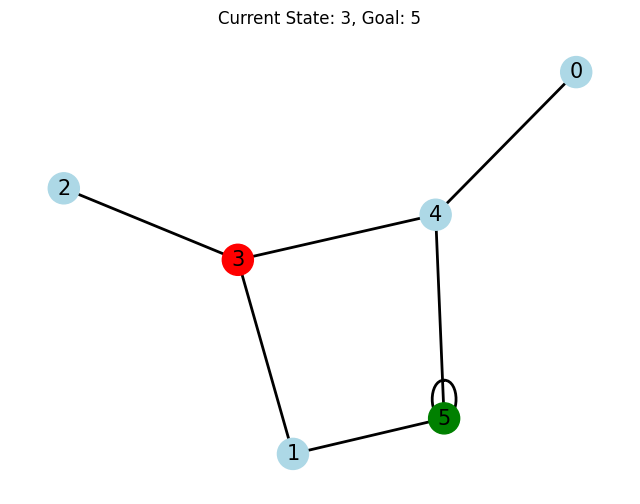

Dal vertice 3, scelta azione 2 con valore Q 95.00


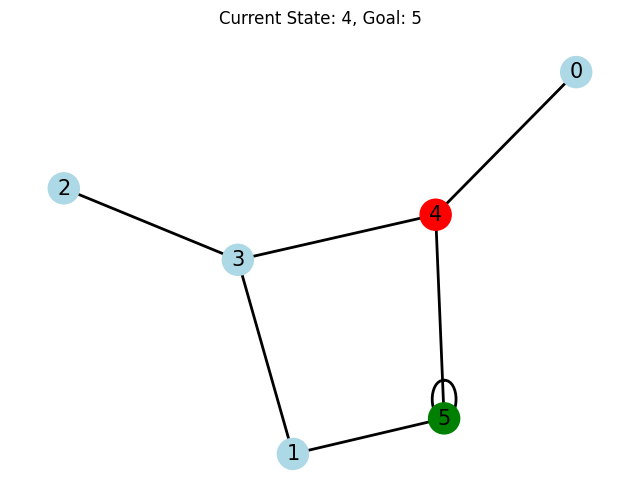

Dal vertice 4, scelta azione 2 con valore Q 100.00


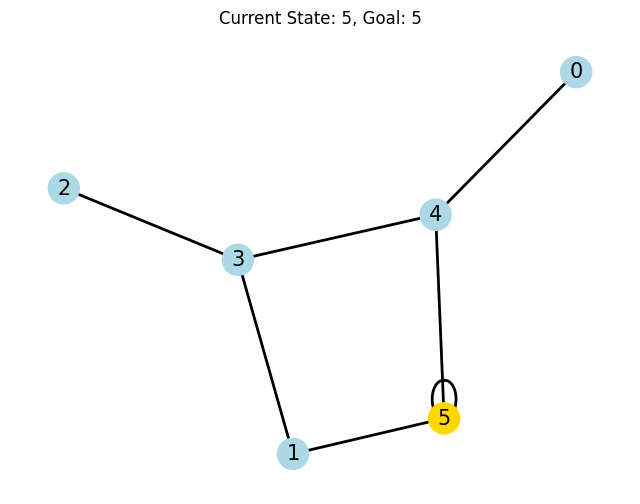

Percorso effettuato: 3 -> 4 -> 5
Obiettivo raggiunto in 2 passi!

Test in corso dal vertice 4:


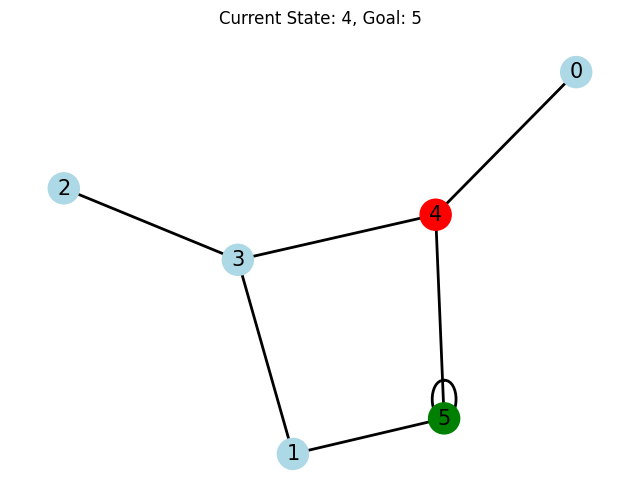

Dal vertice 4, scelta azione 2 con valore Q 100.00


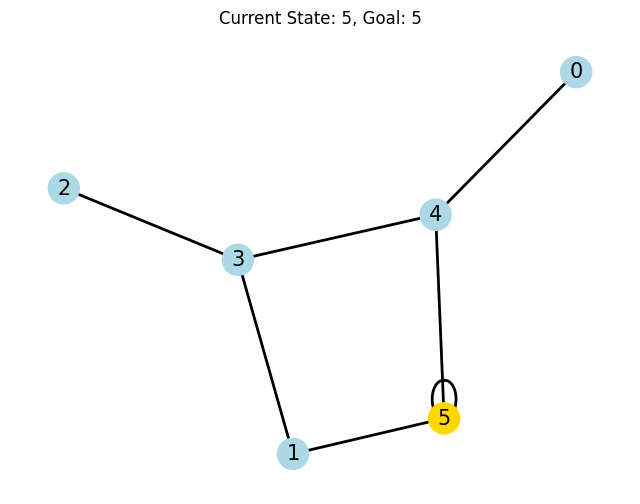

Percorso effettuato: 4 -> 5
Obiettivo raggiunto in 1 passi!


In [20]:
# Addestrare l'agente
print("Training the agent...")
env, agent = train_agent(episodes=300, render_every=50)
# Allena l'agente Q-Learning usando la funzione train_agent, che esegue l'addestramento per 300 episodi. Ogni 50 episodi (render_every=50), 
# visualizza il grafo per monitorare i progressi. Restituisce: env: L'ambiente usato durante l'addestramento.
# agent: L'agente con  la sua Q-table aggiornata.

# Mostrare la Q-table finale
print("\nFinal Q-table:")
for state in range(6):
    valid_actions = env.get_valid_actions(state)  # Ottieni il numero di azioni valide
    print(f"State {state}: {agent.q_table[state, :valid_actions]}")
# Visualizza la Q-table finale appresa dall'agente. Per ogni stato (nodo del grafo): Stampa i valori 𝑄 ( 𝑠 , 𝑎 ) per le azioni valide (ossia
# i nodi vicini a quello corrente). Obiettivo: La tabella mostra i valori stimati delle azioni, aiutando a verificare che l'agente abbia 
# appreso una buona politica.

# Visualizzare la politica appresa
print("\nLearned policy visualization:")
visualize_policy(env, agent)
# Usa la funzione visualize_policy per creare un grafo diretto che rappresenta la politica appresa. Ogni nodo è collegato al suo prossimo stato 
# ottimale tramite una freccia (azione migliore secondo la Q-table). Gli archi mostrano i valori Q ( 𝑄 ( 𝑠 , 𝑎 ) ), che indicano quanto 
# è "utile" un'azione.

# Test della politica da ogni posizione iniziale
for start in range(5):  # Test da vertici 0-4 (escludendo il nodo goal 5)
    test_policy(env, agent, start)
# Esegue un test della politica appresa partendo da ciascun nodo iniziale (0-4). Usa la funzione test_policy per: Seguire la politica basata sui 
# valori  𝑄 ( 𝑠 , 𝑎 ) . Mostrare il percorso compiuto dall'agente passo per passo. Verificare se l'agente raggiunge con successo il nodo obiettivo 
# (nodo 5). Obiettivo: Dimostrare che l'agente può navigare con successo il grafo basandosi sulla politica appresa.